In [1]:
import os
import glob
import ast
import json
import pickle
import numpy as np
import seaborn as sns
import pandas as pd
from dance_evaluation import *
import matplotlib.pyplot as plt

def load_from_pickle(filepath):
    """Load json_tempodata from a Pickle (.pkl) file."""
    # filepath = os.path.join(readpath, filename)
    with open(filepath, "rb") as f:
        json_tempodata = pickle.load(f)
    return json_tempodata

In [ ]:
a = 70
b = 145
mode = "uni"
norm_mode = "z-score"
# metric_name = "median"

bpm_dict = {
    "bpm_avg_x": 0, "bpm_avg_y": 1, "bpm_avg_xy": 2, "bpm_mode_x": 3,
    "bpm_mode_y": 4, "bpm_mode_xy": 5, "bpm_median_x": 6, "bpm_median_y": 7,
    "bpm_median_xy": 8
}

pos_hits_stats = load_from_pickle(f"./stats_pos/{norm_mode}/tempo_{a}_{b}/{mode}/hit_stats_{mode}_{a}_{b}.pkl")
pos_consistency_stats = load_from_pickle(f"./stats_pos/{norm_mode}/tempo_{a}_{b}/{mode}/consistency_stats_{mode}_{a}_{b}.pkl")
pos_hits_stats_genrewise = load_from_pickle(f"./stats_pos/{norm_mode}/tempo_{a}_{b}/{mode}/hit_stats_genrewise_{mode}_{a}_{b}.pkl")      # hits summary genre wise          
pos_consistency_stats_genrewise = load_from_pickle(f"./stats_pos/{norm_mode}/tempo_{a}_{b}/{mode}/consistency_stats_genrewise_{mode}_{a}_{b}.pkl")

vel_hits_stats = load_from_pickle(f"./stats_vel/{norm_mode}/tempo_{a}_{b}/{mode}/hit_stats_{mode}_{a}_{b}.pkl")
vel_consistency_stats = load_from_pickle(f"./stats_vel/{norm_mode}/tempo_{a}_{b}/{mode}/consistency_stats_{mode}_{a}_{b}.pkl")
vel_hits_stats_genrewise = load_from_pickle(f"./stats_vel/{norm_mode}/tempo_{a}_{b}/{mode}/hit_stats_genrewise_{mode}_{a}_{b}.pkl")      # hits summary genre wise          
vel_consistency_stats_genrewise = load_from_pickle(f"./stats_vel/{norm_mode}/tempo_{a}_{b}/{mode}/consistency_stats_genrewise_{mode}_{a}_{b}.pkl")

posvel_hits_stats = load_from_pickle(f"./stats_posvel/{norm_mode}/tempo_{a}_{b}/{mode}/hit_stats_{mode}_{a}_{b}.pkl")
posvel_consistency_stats = load_from_pickle(f"./stats_posvel/{norm_mode}/tempo_{a}_{b}/{mode}/consistency_stats_{mode}_{a}_{b}.pkl")
posvel_hits_stats_genrewise = load_from_pickle(f"./stats_posvel/{norm_mode}/tempo_{a}_{b}/{mode}/hit_stats_genrewise_{mode}_{a}_{b}.pkl")      # hits summary genre wise          
posvel_consistency_stats_genrewise = load_from_pickle(f"./stats_posvel/{norm_mode}/tempo_{a}_{b}/{mode}/consistency_stats_genrewise_{mode}_{a}_{b}.pkl")

In [3]:
pos_consistency_stats['bpm_avg_x'].keys()

dict_keys(['Lh-Rh (Hands)', 'Lf-Rf (Feet)', 'Lh-Lf (Left Side)', 'Rh-Rf (Right Side)', 'Lh-Rf (Diagonal)', 'Rh-Lf (Diagonal)'])

#### Overall Tempo Accuracy

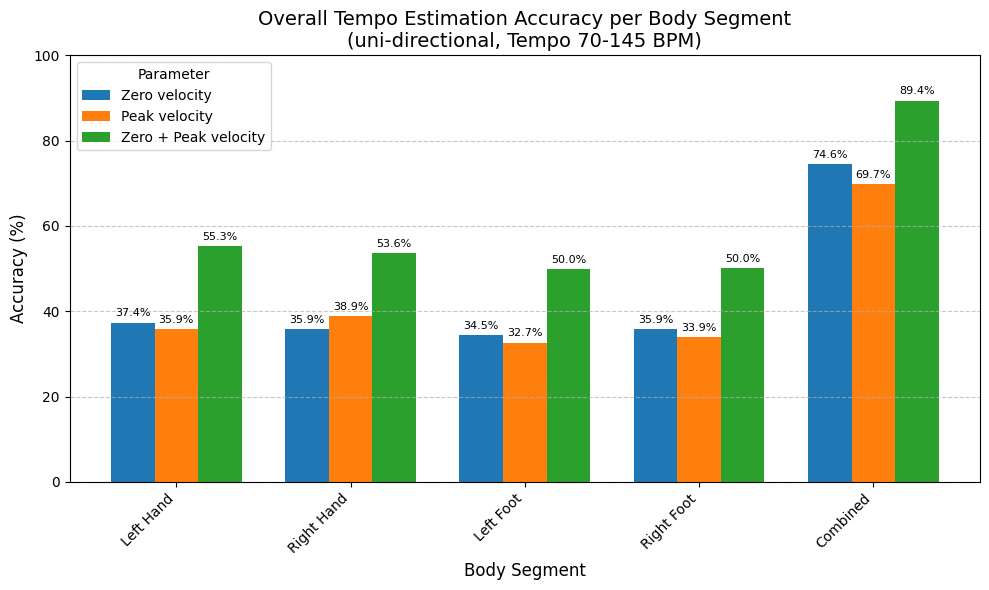

In [4]:
# Grouped bar plot
# pos_df = pd.read_csv(f"./stats_pos/{norm_mode}/tempo_{a}_{b}/{mode}/hits_{mode}_{a}_{b}.csv")
# vel_df = pd.read_csv(f"./stats_vel/{norm_mode}/tempo_{a}_{b}/{mode}/hits_{mode}_{a}_{b}.csv")
# posvel_df = pd.read_csv(f"./stats_posvel/{norm_mode}/tempo_{a}_{b}/{mode}/hits_{mode}_{a}_{b}.csv")

pos_df = pos_hits_stats['bpm_avg_x']['hits_summary']
vel_df = vel_hits_stats['bpm_avg_x']['hits_summary']
posvel_df = posvel_hits_stats['bpm_avg_x']['hits_summary']

# Plot parameters
x = np.arange(len(pos_df["segment"]))  # Segment indices
width = 0.25  # Width of the bars (adjusted for three groups)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width, pos_df["hits_percentage"], width, label='Zero velocity', color='#1f77b4')
bars2 = ax.bar(x, vel_df["hits_percentage"], width, label='Peak velocity', color='#ff7f0e')
bars3 = ax.bar(x + width, posvel_df["hits_percentage"], width, label='Zero + Peak velocity', color='#2ca02c')

# Add text labels on top of each bar
for bars in [bars1, bars2, bars3]:
    ax.bar_label(bars, fmt='%.1f%%', padding=3, fontsize=8)

# Plot aesthetics
ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_xlabel('Body Segment', fontsize=12)
ax.set_title(f'Overall Tempo Estimation Accuracy per Body Segment\n({mode}-directional, Tempo {a}-{b} BPM)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(pos_df["segment"], rotation=45, ha='right', fontsize=10)
ax.set_ylim(0, 100)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(title="Parameter", fontsize=10, title_fontsize=10)

plt.tight_layout()
plt.show()

#### Tempo Estimation Accuracy by Genre

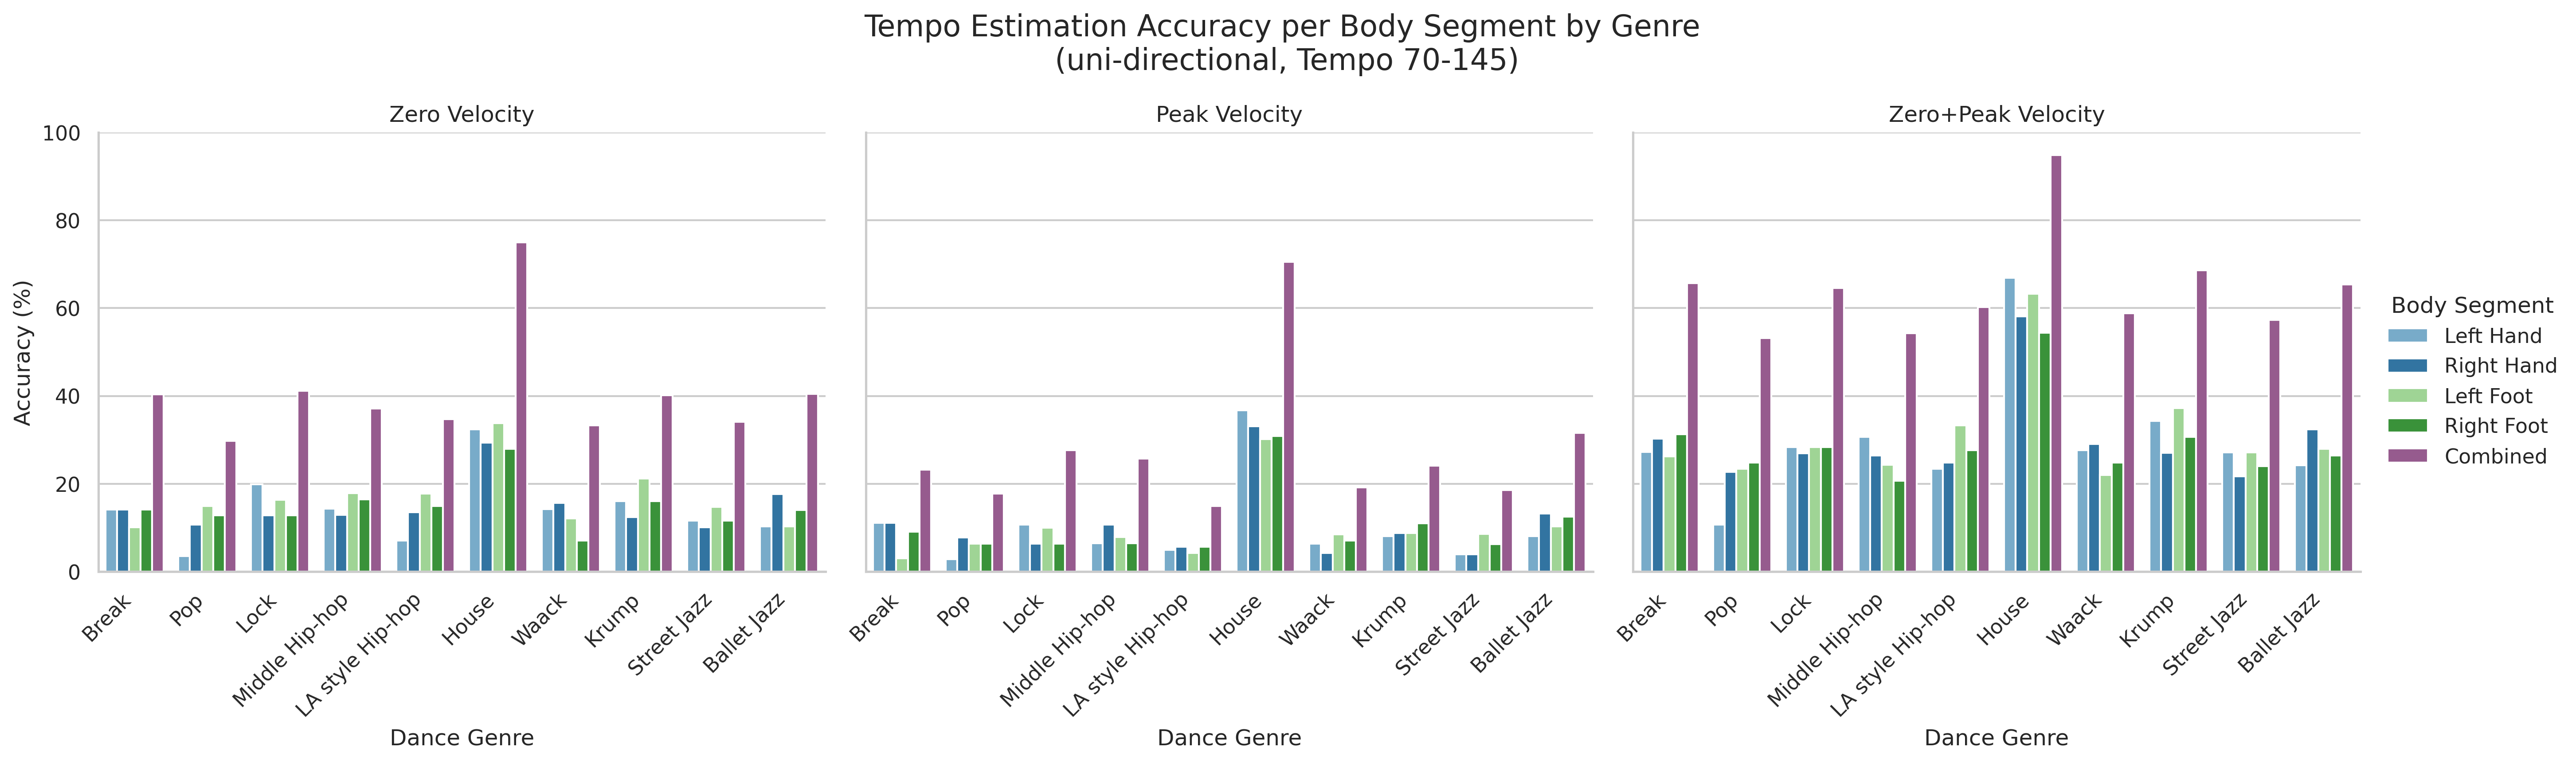

In [5]:
def melt_df(df, metric_label):
    melted = df.melt(
        id_vars=["genre"],
        value_vars=["left_hand_percentage", "right_hand_percentage", "left_foot_percentage", "right_foot_percentage", "Combined_percentage"],
        var_name="Segment",
        value_name="Accuracy"
    )
    # Mapping for cleaner labels
    segment_map = {
        "left_hand_percentage": "Left Hand",
        "right_hand_percentage": "Right Hand",
        "left_foot_percentage": "Left Foot",
        "right_foot_percentage": "Right Foot",
        "Combined_percentage": "Combined"
    }
    melted["Segment"] = melted["Segment"].map(segment_map)
    melted["Metric"] = metric_label
    return melted


# 📊 Combine all metrics
pos_melt = melt_df(pos_hits_stats_genrewise['bpm_avg_x'], "Zero Velocity")
vel_melt = melt_df(vel_hits_stats_genrewise['bpm_avg_x'], "Peak Velocity")
posvel_melt = melt_df(posvel_hits_stats_genrewise['bpm_avg_x'], "Zero+Peak Velocity")

combined_df = pd.concat([pos_melt, vel_melt, posvel_melt])

palette = {
    "Left Hand": "#6baed6",   # Light Blue (Left Hand)
    "Right Hand": "#1f77b4",  # Dark Blue (Right Hand)
    "Left Foot": "#98df8a",   # Light Green (Left Foot)
    "Right Foot": "#2ca02c",  # Dark Green (Right Foot)
    "Combined": "#a05195"     # Purple (Combined)
}

# Faceted grouped vertical bar chart
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=combined_df,
    kind="bar",
    x="genre", y="Accuracy", hue="Segment",
    col="Metric",  # Facet by metric
    palette=palette,
    height=5, aspect=1.2,
    legend_out=True
)

g.fig.set_dpi(300)
g.set_axis_labels("Dance Genre", "Accuracy (%)")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45, ha='right')
g.set(ylim=(0, 100))
g._legend.set_title("Body Segment")

# 🔖 Add percentage labels on top of bars
# for ax in g.axes.flat:
#     for container in ax.containers:
#         ax.bar_label(container, fmt='%.1f%%', padding=3, fontsize=9)

plt.subplots_adjust(top=0.80)
g.figure.suptitle(f"Tempo Estimation Accuracy per Body Segment by Genre\n ({mode}-directional, Tempo {a}-{b})", fontsize=16)
plt.show()


#### Inter limb tempo consistency score

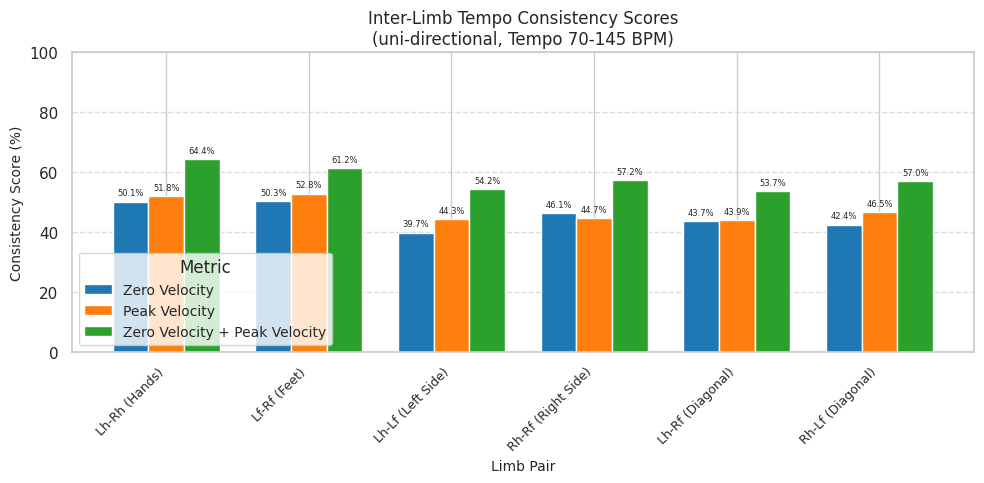

In [6]:

# Combine all three datasets into a single DataFrame
combined_df = pd.DataFrame({
    "Pair": pos_consistency_stats['bpm_avg_x'].keys(),
    "Position": pos_consistency_stats['bpm_avg_x'].values(),
    "Velocity": vel_consistency_stats['bpm_avg_x'].values(),
    "PosVel": posvel_consistency_stats['bpm_avg_x'].values()
})

# Create grouped bar plot
x = np.arange(len(combined_df["Pair"]))  # label locations
width = 0.25  # width of the bars

fig, ax = plt.subplots(figsize=(10, 5))

bars1 = ax.bar(x - width, combined_df["Position"], width, label="Zero Velocity", color="#1f77b4")
bars2 = ax.bar(x, combined_df["Velocity"], width, label="Peak Velocity", color="#ff7f0e")
bars3 = ax.bar(x + width, combined_df["PosVel"], width, label="Zero Velocity + Peak Velocity", color="#2ca02c")

# Formatting the plot
ax.set_xlabel("Limb Pair", fontsize=10)
ax.set_ylabel("Consistency Score (%)", fontsize=10)
ax.set_title(f"Inter-Limb Tempo Consistency Scores\n({mode}-directional, Tempo {a}-{b} BPM)", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(combined_df["Pair"], rotation=45, ha="right", fontsize=9)
ax.set_ylim(0, 100)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(title="Metric", fontsize=10, loc= 'lower left')

# Adding percentage labels on top of bars
for bars in [bars1, bars2, bars3]:
    ax.bar_label(bars, fmt='%.1f%%', padding=3, fontsize=6)

plt.tight_layout()
plt.show()


In [7]:
pos_consistency_stats_genrewise['bpm_avg_x']

,genre,Lhand-Rhand (Hands),Lfoot-Rfoot (Feet),Lhand-Lfoot (Left Side),Rhand-Rfoot (Right Side),Lhand-Rfoot (Diagonal),Rhand-Lfoot (Diagonal)
0,Break,21.43,7.14,21.43,21.43,14.29,14.29
1,Pop,6.67,33.33,9.52,27.78,5.56,9.52
2,Lock,32.14,30.43,25.00,16.67,17.86,17.39
3,Middle Hip-hop,35.00,44.00,24.00,34.78,26.09,28.00
4,LA style Hip-hop,15.79,36.00,8.00,33.33,14.29,40.00
5,House,40.91,36.96,28.26,32.50,36.36,26.09
6,Waack,31.82,5.88,35.00,4.55,10.00,36.36
7,Krump,31.82,37.93,34.48,27.27,18.18,31.03
8,Street Jazz,13.33,21.05,5.26,20.00,26.67,26.32
9,Ballet Jazz,20.83,15.79,7.14,25.00,10.53,4.17


#### Hand & Foot tempo consistency score by genre

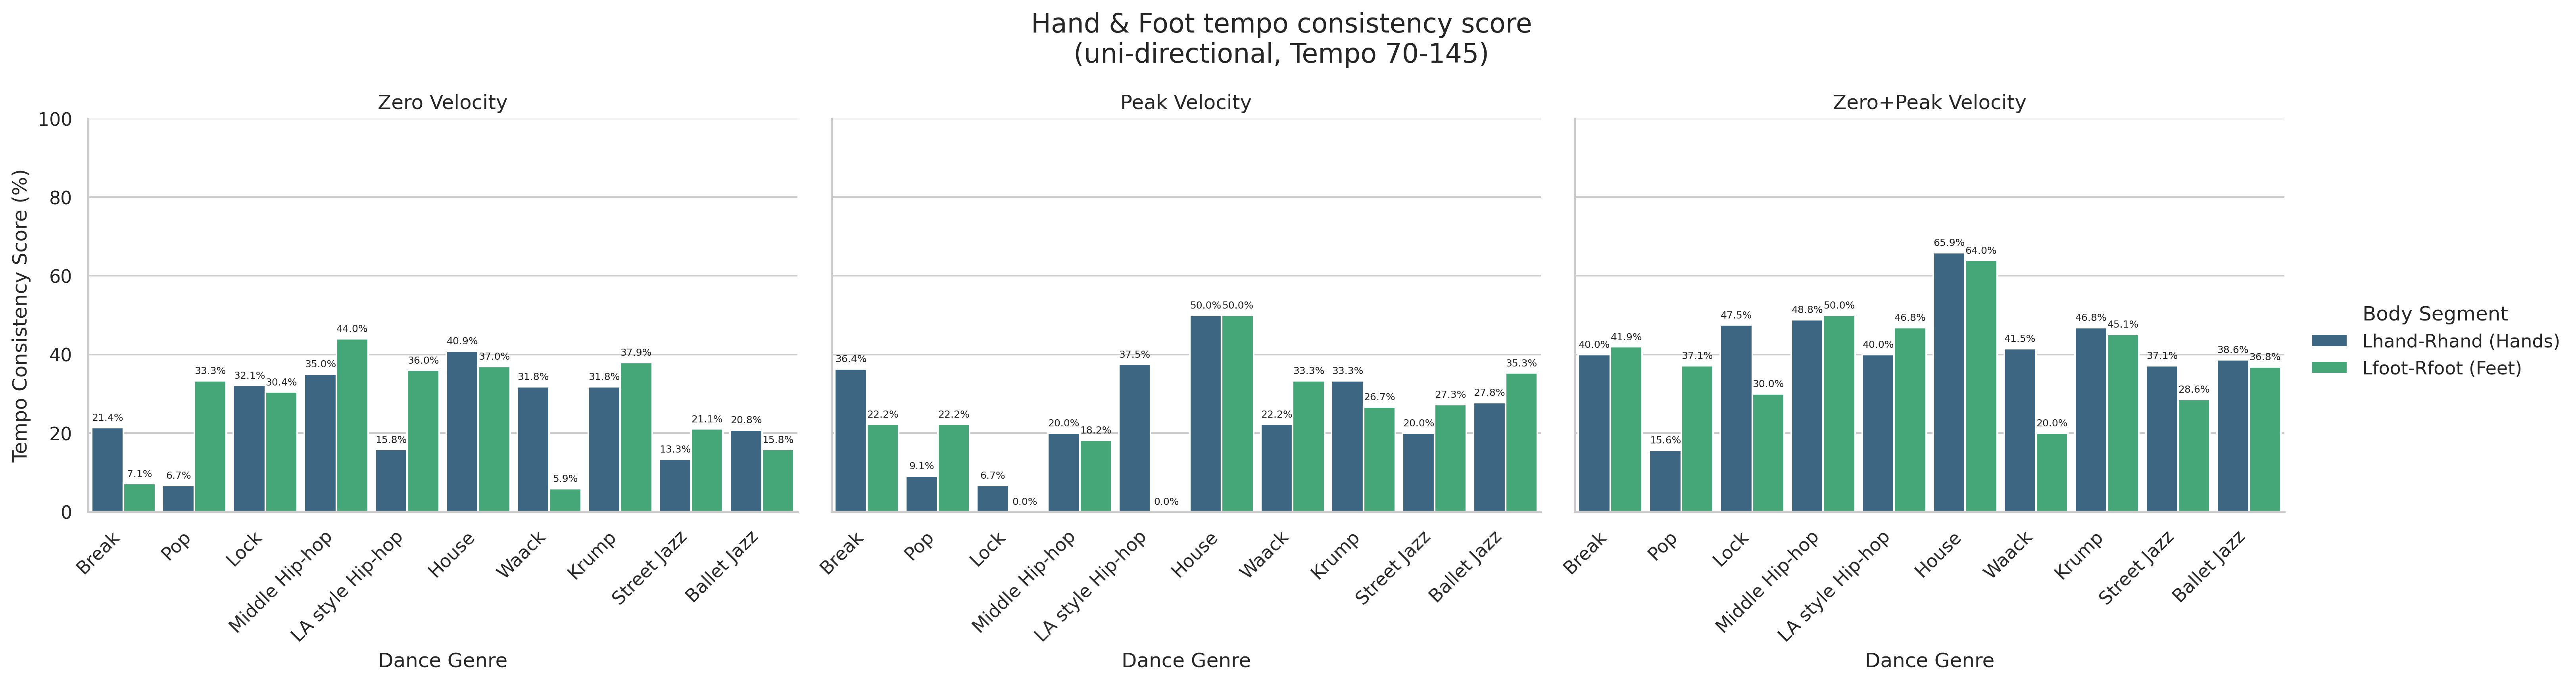

In [8]:
def melt_df(df, metric_label):
    return df.melt(
        id_vars=["genre"],
        value_vars=["Lhand-Rhand (Hands)", "Lfoot-Rfoot (Feet)"],
        var_name="Segment",
        value_name="Consistency_Score"
    ).assign(Metric=metric_label)

pos_melt = melt_df(pos_consistency_stats_genrewise['bpm_avg_x'], "Zero Velocity")
vel_melt = melt_df(vel_consistency_stats_genrewise['bpm_avg_x'], "Peak Velocity")
posvel_melt = melt_df(posvel_consistency_stats_genrewise['bpm_avg_x'], "Zero+Peak Velocity")

combined_df = pd.concat([pos_melt, vel_melt, posvel_melt])

# 🏃‍♂️ Plotting faceted grouped bar chart
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=combined_df,
    kind="bar",
    x="genre", y="Consistency_Score", hue="Segment",
    col="Metric", col_wrap=3,
    palette="viridis",
    height=5, aspect=1.3,
    width= 0.9,
    legend=True,
    legend_out=True,

)

g.figure.set_dpi(300)
g.set_axis_labels("Dance Genre", "Tempo Consistency Score (%)")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45, ha='right')
g.set(ylim=(0, 100))
# g.add_legend(title="Body Segment")
g._legend.set_title("Body Segment")

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', padding=3, fontsize=6)

plt.subplots_adjust(top=0.80)
g.figure.suptitle(f"Hand & Foot tempo consistency score\n({mode}-directional, Tempo {a}-{b})", fontsize=16)
plt.show()


#### Left Side & Right Side Tempo Consistency Score

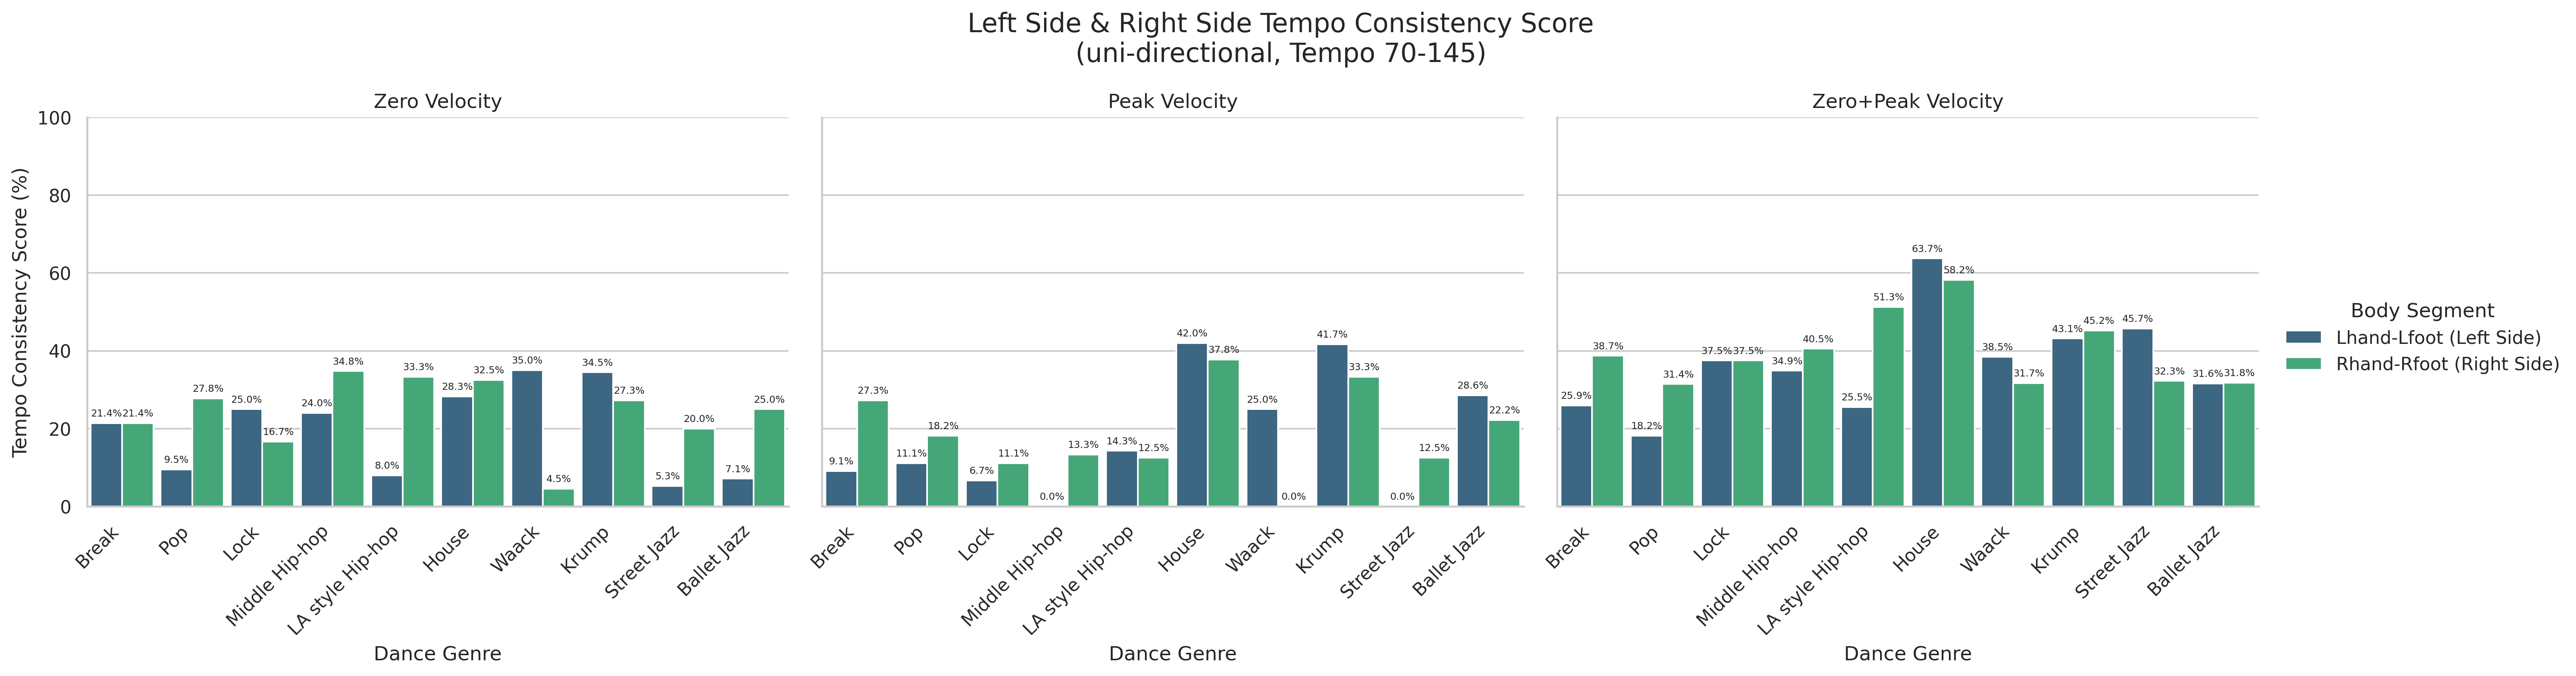

In [9]:
def melt_df(df, metric_label):
    return df.melt(
        id_vars=["genre"],
        value_vars=["Lhand-Lfoot (Left Side)", "Rhand-Rfoot (Right Side)"],
        var_name="Segment",
        value_name="Consistency_Score"
    ).assign(Metric=metric_label)

pos_melt = melt_df(pos_consistency_stats_genrewise['bpm_avg_x'], "Zero Velocity")
vel_melt = melt_df(vel_consistency_stats_genrewise['bpm_avg_x'], "Peak Velocity")
posvel_melt = melt_df(posvel_consistency_stats_genrewise['bpm_avg_x'], "Zero+Peak Velocity")

side_combined_df = pd.concat([pos_melt, vel_melt, posvel_melt])

# 🏃‍♂️ Plotting faceted grouped bar chart
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=side_combined_df,
    kind="bar",
    x="genre", y="Consistency_Score", hue="Segment",
    col="Metric", col_wrap=3,
    palette="viridis",
    height=5, aspect=1.3,
    width= 0.9,
    legend=True,
    legend_out=True,

)

g.fig.set_dpi(300)
g.set_axis_labels("Dance Genre", "Tempo Consistency Score (%)")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45, ha='right')
g.set(ylim=(0, 100))
# g.add_legend(title="Body Segment")
g._legend.set_title("Body Segment")

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', padding=3, fontsize=6)

plt.subplots_adjust(top=0.80)
g.figure.suptitle(f"Left Side & Right Side Tempo Consistency Score\n({mode}-directional, Tempo {a}-{b})", fontsize=16)
plt.show()


#### Diagonal Tempo Consistency Score

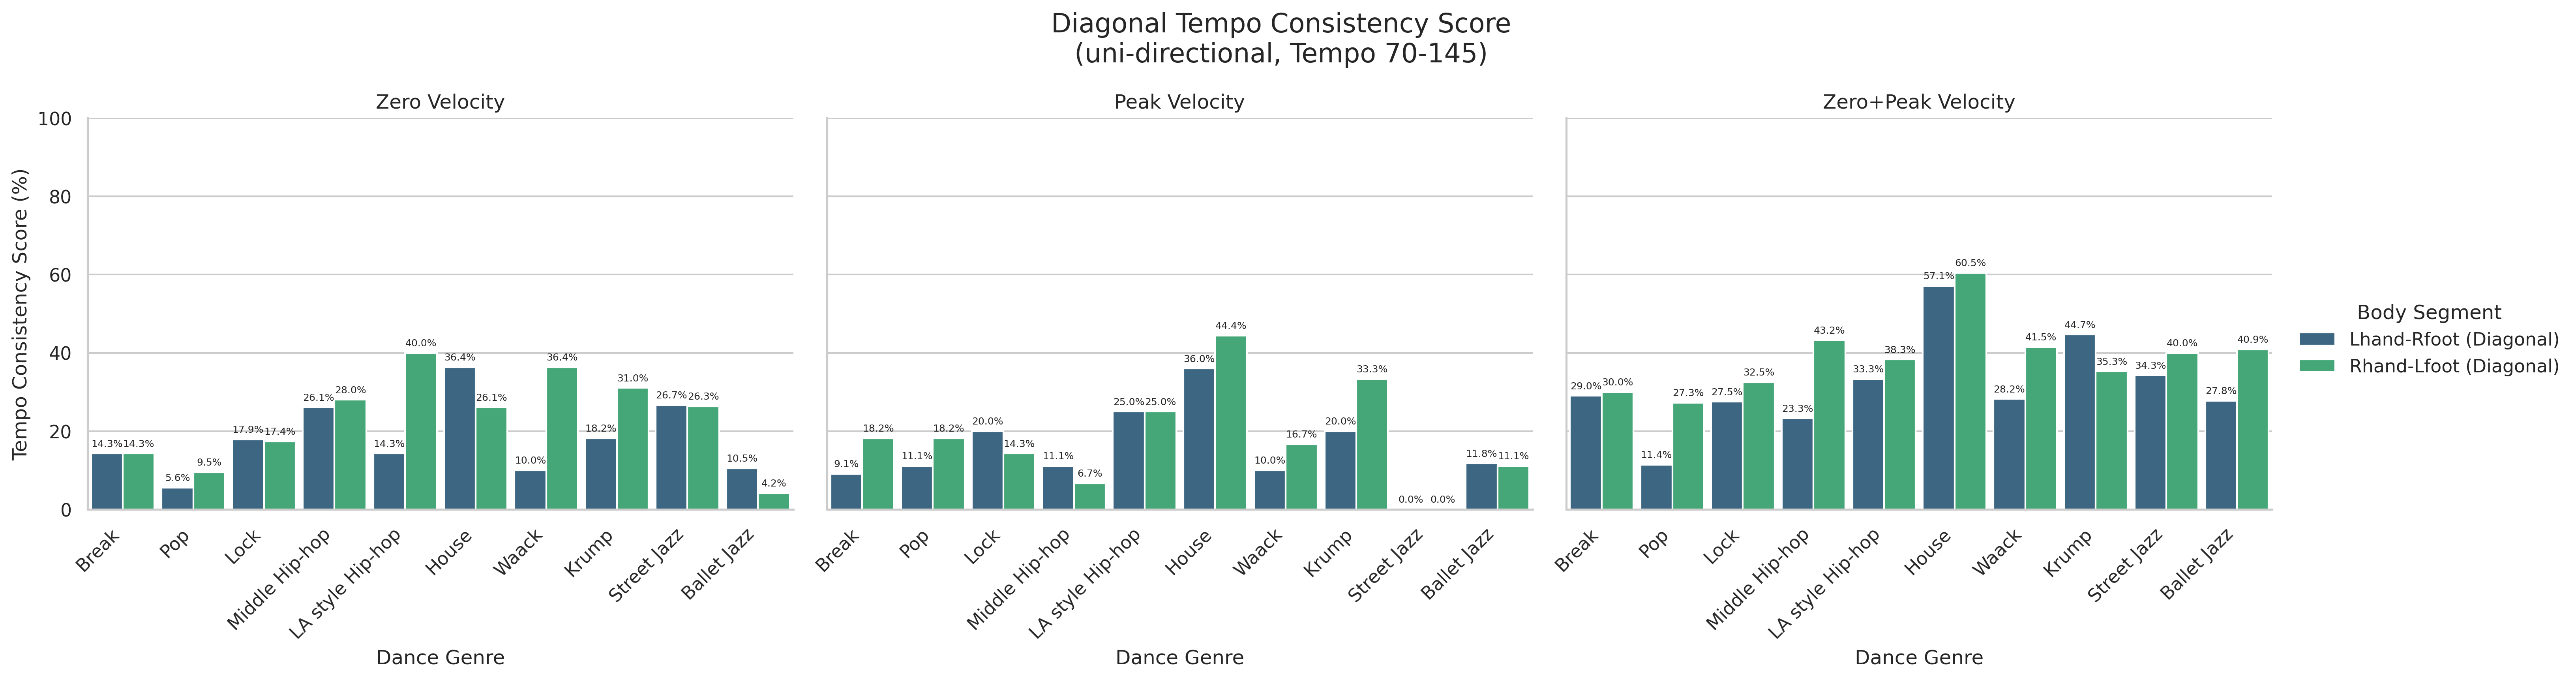

In [10]:
def melt_df(df, metric_label):
    return df.melt(
        id_vars=["genre"],
        value_vars=["Lhand-Rfoot (Diagonal)", "Rhand-Lfoot (Diagonal)"],
        var_name="Segment",
        value_name="Consistency_Score"
    ).assign(Metric=metric_label)

pos_melt = melt_df(pos_consistency_stats_genrewise['bpm_avg_x'], "Zero Velocity")
vel_melt = melt_df(vel_consistency_stats_genrewise['bpm_avg_x'], "Peak Velocity")
posvel_melt = melt_df(posvel_consistency_stats_genrewise['bpm_avg_x'], "Zero+Peak Velocity")

diagonal_combined_df = pd.concat([pos_melt, vel_melt, posvel_melt])

# 🏃‍♂️ Plotting faceted grouped bar chart
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=diagonal_combined_df,
    kind="bar",
    x="genre", y="Consistency_Score", hue="Segment",
    col="Metric", col_wrap=3,
    palette="viridis",
    height=5, aspect=1.3,
    width= 0.9,
    legend=True,
    legend_out=True,
)

g.figure.set_dpi(300)
g.set_axis_labels("Dance Genre", "Tempo Consistency Score (%)")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45, ha='right')
g.set(ylim=(0, 100))
# g.add_legend(title="Body Segment")
g._legend.set_title("Body Segment")

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', padding=3, fontsize=6)

plt.subplots_adjust(top=0.80)
g.figure.suptitle(f"Diagonal Tempo Consistency Score\n({mode}-directional, Tempo {a}-{b})", fontsize=16)
plt.show()


#### Box Plot

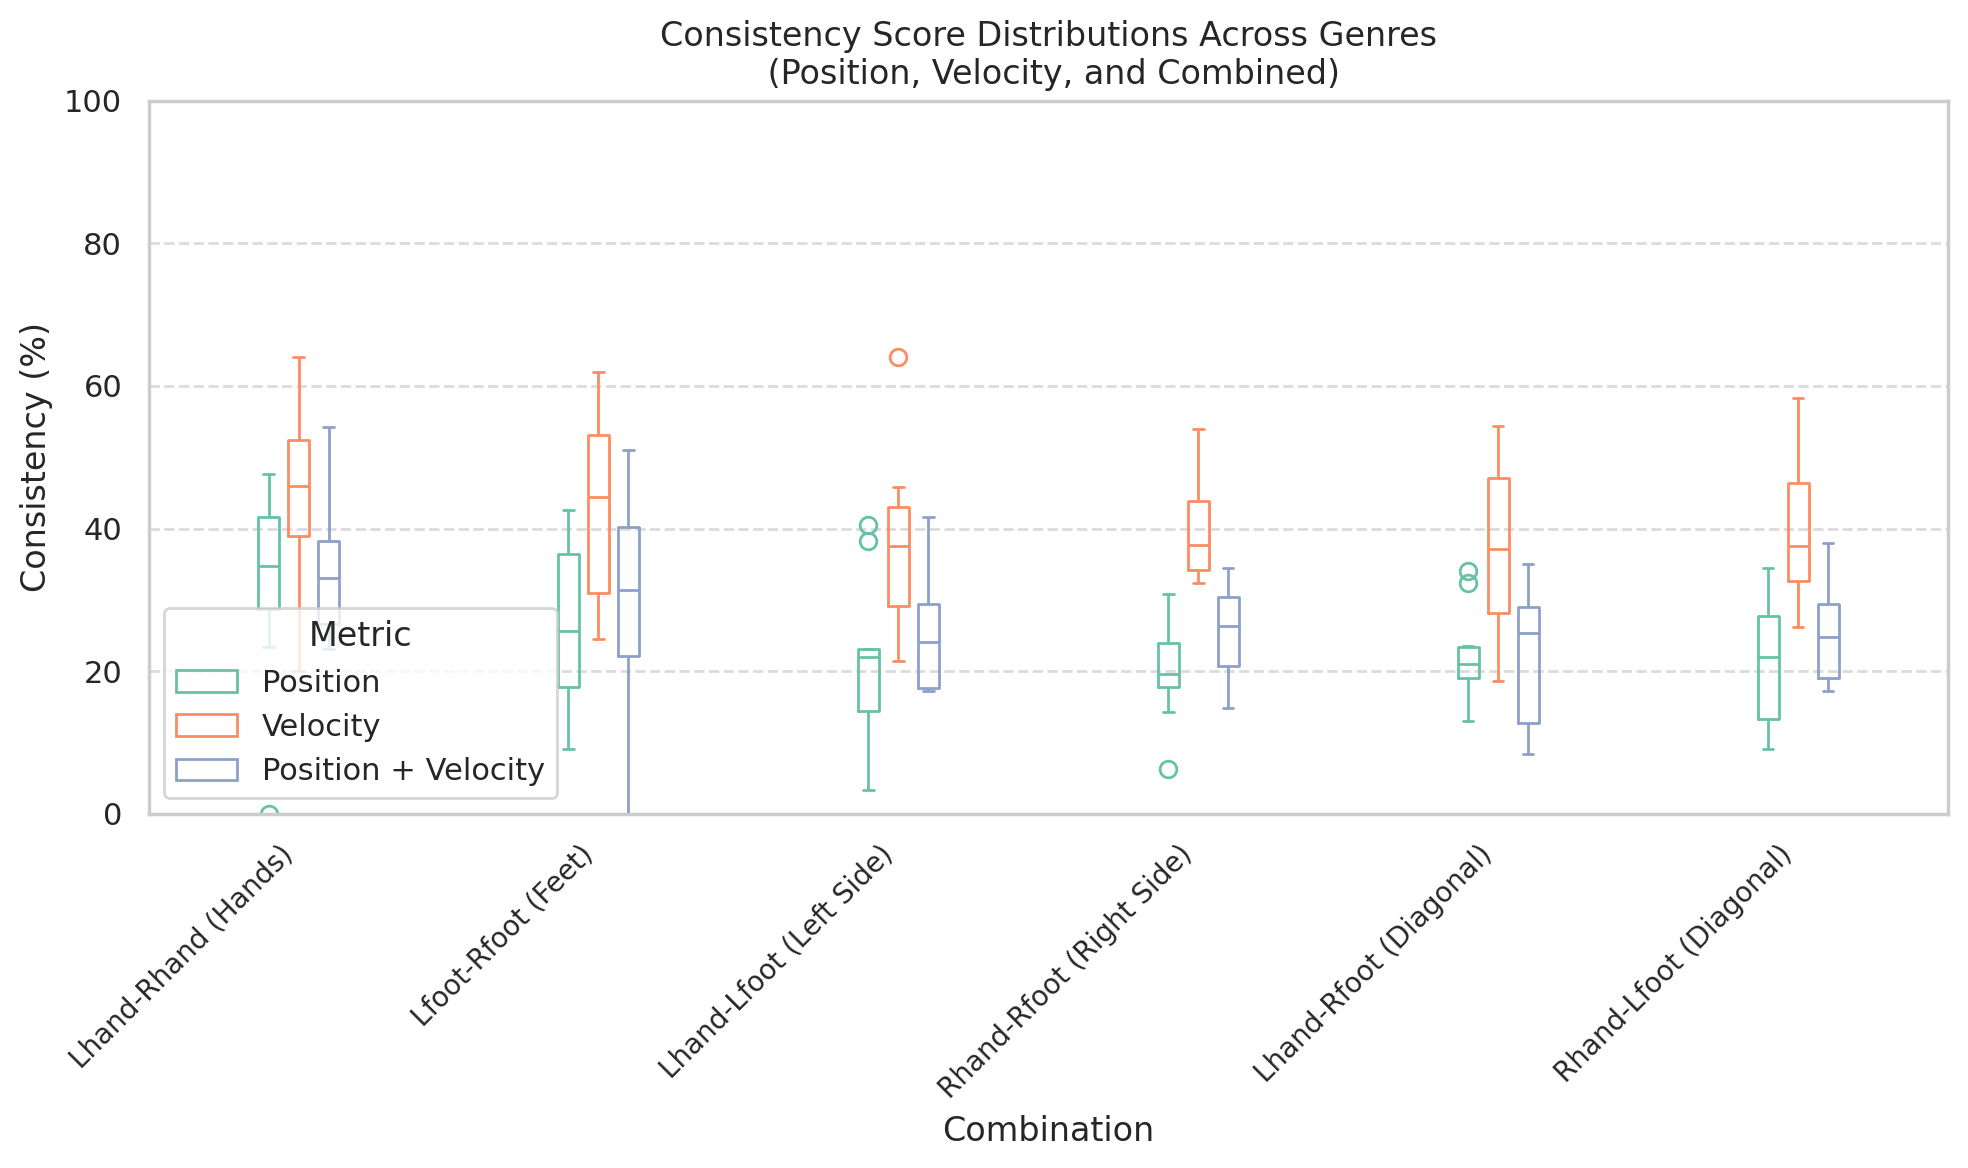

In [41]:
combination = [
    "Lhand-Rhand (Hands)",
    "Lfoot-Rfoot (Feet)",
    "Lhand-Lfoot (Left Side)",
    "Rhand-Rfoot (Right Side)",
    "Lhand-Rfoot (Diagonal)",
    "Rhand-Lfoot (Diagonal)"
]

bpm_metric = "bpm_avg_xy"

# Melt each dataframe for long-form representation
posvel_long = pos_consistency_stats_genrewise[bpm_metric].melt(
    id_vars=["genre"], value_vars=combination,
    var_name="Type", value_name="Consistency (%)"
)
posvel_long["Consistency Type"] = "Position + Velocity"

pos_long = vel_consistency_stats_genrewise[bpm_metric].melt(
    id_vars=["genre"], value_vars=combination,
    var_name="Type", value_name="Consistency (%)"
)
pos_long["Consistency Type"] = "Position"

vel_long = posvel_consistency_stats_genrewise[bpm_metric].melt(
    id_vars=["genre"], value_vars=combination,
    var_name="Type", value_name="Consistency (%)"
)
vel_long["Consistency Type"] = "Velocity"

# Combine all long-form dataframes
combined_long = pd.concat([pos_long, vel_long, posvel_long,])

# Create the grouped boxplot
plt.figure(figsize=(10, 6), dpi=200)
sns.boxplot(
    data=combined_long,
    x="Type",
    y="Consistency (%)",
    hue="Consistency Type",  # Grouping by Consistency Type
    palette="Set2",
    width=0.3,
    gap=0.3,
    fill=False,
    linewidth=1
)

# Plot aesthetics
plt.title(f"Consistency Score Distributions Across Genres\n (Position, Velocity, and Combined)")
plt.xlabel("Combination")
plt.ylabel("Consistency (%)")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0, 100)
plt.legend(title="Metric", loc="lower left")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


#### Tempo Estimation Accuracy per Body Segment by Metric

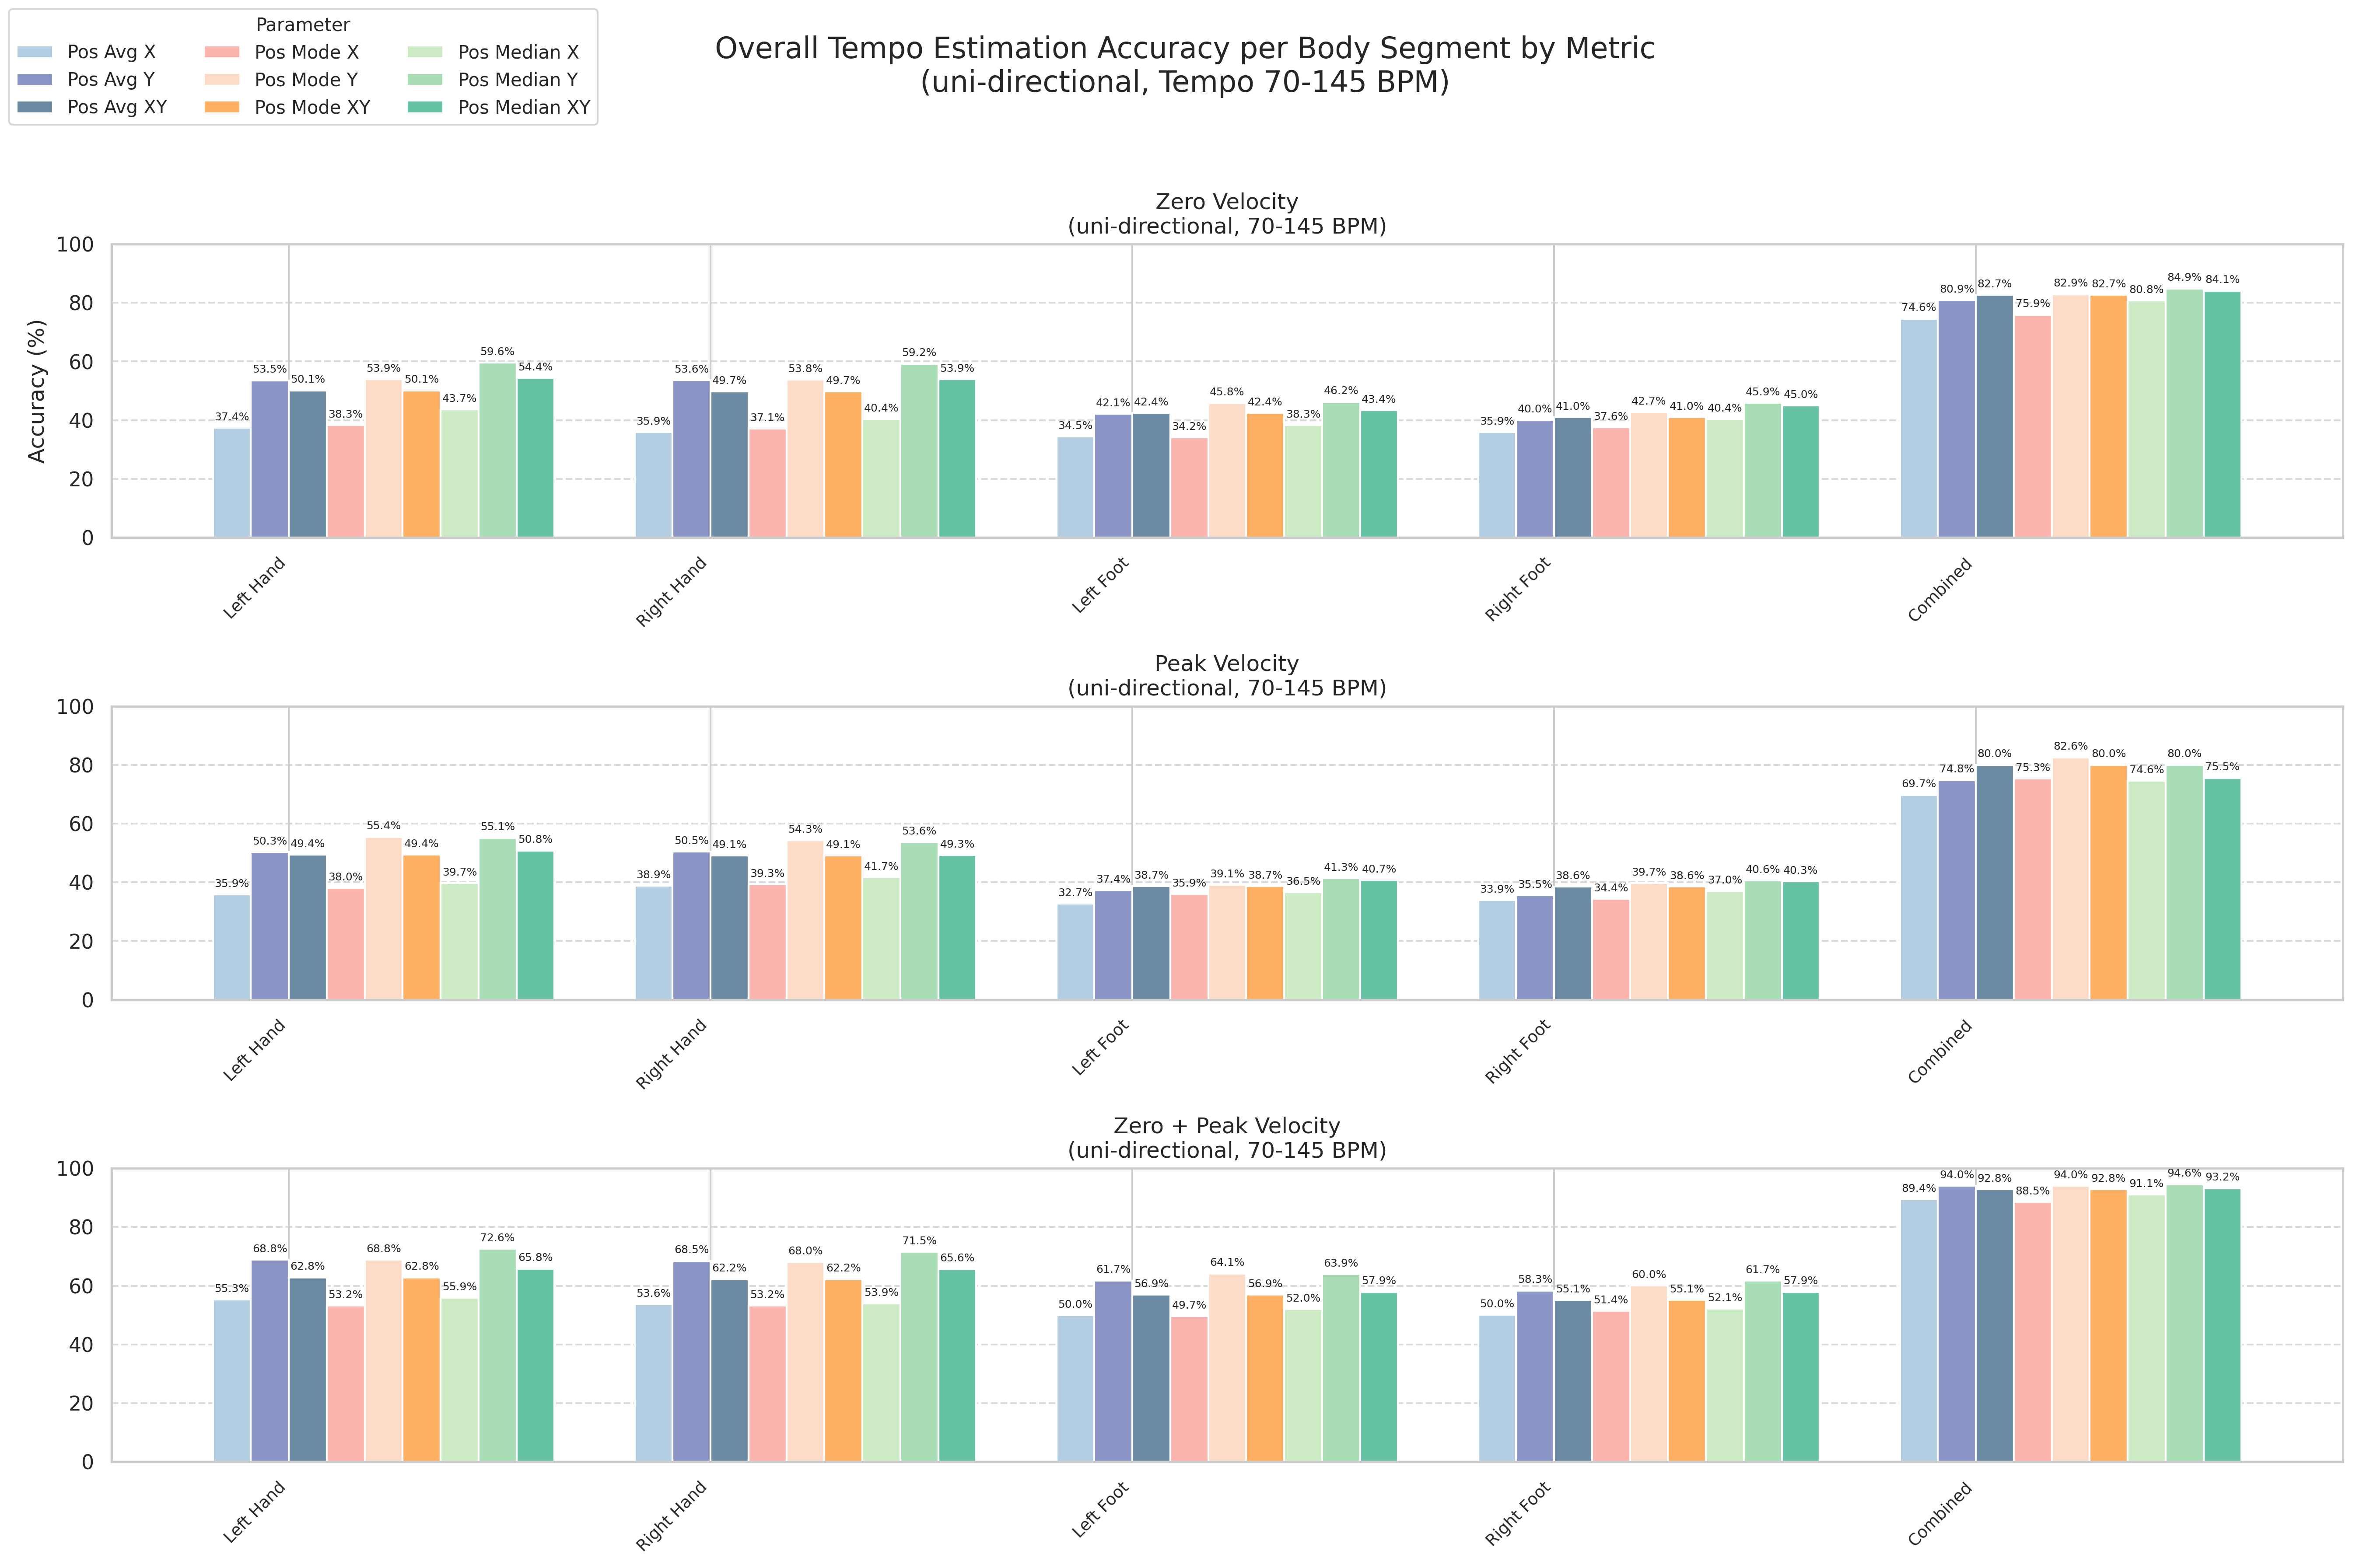

In [38]:
# Define metric categories
fig, axes = plt.subplots(3, 1, figsize=(18, 12), sharey=True, dpi=300)
width = 0.09  # Bar width for grouped bars

pos_colors = ['#b3cde3', '#8c96c6', '#6b8ba4']  # Muted blue/purple shades for Pos
vel_colors = ['#fbb4ae', '#fddbc7', '#fdae61']  # Muted warm orange/pink shades for Vel
posvel_colors = ['#ccebc5', '#a8ddb5', '#66c2a5']  # Muted greenish shades for PosVel

labl = {"Zero Velocity": "Pos", "Peak Velocity": "Vel", "Zero + Peak Velocity": "Pos+Vel"}
hit_stats_list = {"Zero Velocity": pos_hits_stats, "Peak Velocity": vel_hits_stats, "Zero + Peak Velocity": posvel_hits_stats}

for ax, (title, current_hit_stats) in zip(axes, hit_stats_list.items()):
    # Get the segment indices
    x = np.arange(len(current_hit_stats['bpm_avg_x']['hits_summary']["segment"]))

    # Create grouped bar plots for each metric category
    bars1 = ax.bar(x - 1.5 * width, current_hit_stats['bpm_avg_x']['hits_summary']['hits_percentage'], width, label=f'{labl[title]} Avg X', color=pos_colors[0])
    bars2 = ax.bar(x - 0.5 * width, current_hit_stats['bpm_avg_y']['hits_summary']['hits_percentage'], width, label=f'{labl[title]} Avg Y', color=pos_colors[1])
    bars3 = ax.bar(x + 0.5 * width, current_hit_stats['bpm_avg_xy']['hits_summary']['hits_percentage'], width, label=f'{labl[title]} Avg XY', color=pos_colors[2])

    bars4 = ax.bar(x + 1.5 * width, current_hit_stats['bpm_mode_x']['hits_summary']['hits_percentage'], width, label=f'{labl[title]} Mode X', color=vel_colors[0])
    bars5 = ax.bar(x + 2.5 * width, current_hit_stats['bpm_mode_y']['hits_summary']['hits_percentage'], width, label=f'{labl[title]} Mode Y', color=vel_colors[1])
    bars6 = ax.bar(x + 3.5 * width, current_hit_stats['bpm_mode_xy']['hits_summary']['hits_percentage'], width, label=f'{labl[title]} Mode XY', color=vel_colors[2])

    bars7 = ax.bar(x + 4.5 * width, current_hit_stats['bpm_median_x']['hits_summary']['hits_percentage'], width, label=f'{labl[title]} Median X', color=posvel_colors[0])
    bars8 = ax.bar(x + 5.5 * width, current_hit_stats['bpm_median_y']['hits_summary']['hits_percentage'], width, label=f'{labl[title]} Median Y', color=posvel_colors[1])
    bars9 = ax.bar(x + 6.5 * width, current_hit_stats['bpm_median_xy']['hits_summary']['hits_percentage'], width, label=f'{labl[title]} Median XY', color=posvel_colors[2])

    # Add bar labels
    for bars in [bars1, bars2, bars3, bars4, bars5, bars6, bars7, bars8, bars9]:
        ax.bar_label(bars, fmt='%.1f%%', padding=3, fontsize=6)

    # Plot aesthetics
    ax.set_title(f'{title}\n({mode}-directional, {a}-{b} BPM)', fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(pos_hits_stats['bpm_avg_x']['hits_summary']["segment"], rotation=45, ha='right', fontsize=9)
    ax.set_ylim(0, 100)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Shared y-axis label
axes[0].set_ylabel('Accuracy (%)', fontsize=12)

# Single legend for all subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Parameter", fontsize=10, title_fontsize=10, loc='upper left', ncol=3)

plt.suptitle(f'Overall Tempo Estimation Accuracy per Body Segment by Metric\n({mode}-directional, Tempo {a}-{b} BPM)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [36]:
hit_stats_list = {"Zero Velocity": pos_hits_stats, "Peak Velocity": vel_hits_stats, "Zero + Peak Velocity": posvel_hits_stats}

for ax, (title_name, current_hit_stats) in zip(axes, hit_stats_list.items()):
    
    print(title_name)
    # print(current_hit_stats)
    break

Zero Velocity
